# Regression Outputs

In [1]:
from IPython.display import HTML, display
import numpy as np
import pandas as pd

import statsmodels.api as sm
from statsmodels.formula.api import ols
#from statsmodels.sandbox.regression.predstd import wls_prediction_std

import seaborn as sns
sns.set_style("darkgrid")

## Model 1: characteristics only

### HK Cities dataset

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_69901/123405169.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  hk_characteristics = pd.read_csv('./Data/Cleaned-Datasets/HK_cities_cleaned.csv')


(105944, 9)
(26487, 9)
(105944,)
(26487,)
Intercept:
-109268.94843216386
                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     9534.
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:44:23   Log-Likelihood:            -1.4639e+06
No. Observations:              105944   AIC:                         2.928e+06
Df Residuals:                  105934   BIC:                         2.928e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

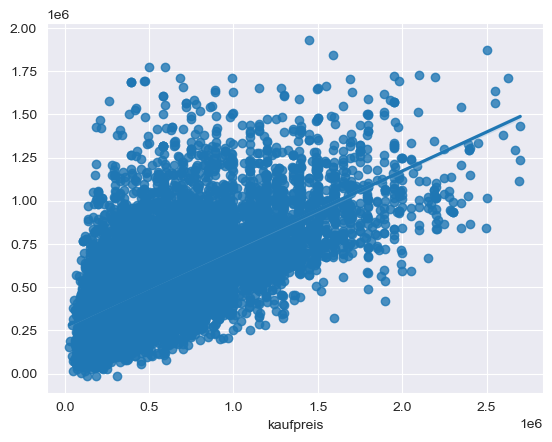

In [5]:
hk_characteristics = pd.read_csv('./Data/Cleaned-Datasets/HK_cities_cleaned.csv')
df_hk_characteristics = pd.DataFrame(hk_characteristics)

X = df_hk_characteristics[['wohnflaeche', 'grundstuecksflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer','keller', 'parkplatz', 'age', 'objektzustand']]
Y = df_hk_characteristics['kaufpreis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Intercept:')
print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
hk_ls=sm.OLS(y_train,X_train_Sm).fit()
#print(hk_ls.summary())

### WK cities dataset

/var/folders/5h/0pnj053913z2cl2pgkgr888h0000gp/T/ipykernel_69901/3387568766.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  wk_characteristics = pd.read_csv('./Data/Cleaned-Datasets/WK_cities_cleaned.csv')


(334231, 7)
(83558, 7)
(334231,)
(83558,)
Intercept:
-123259.85104724008
                            OLS Regression Results                            
Dep. Variable:              kaufpreis   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.470
Method:                 Least Squares   F-statistic:                 4.237e+04
Date:                Wed, 26 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:44:47   Log-Likelihood:            -4.5200e+06
No. Observations:              334231   AIC:                         9.040e+06
Df Residuals:                  334223   BIC:                         9.040e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

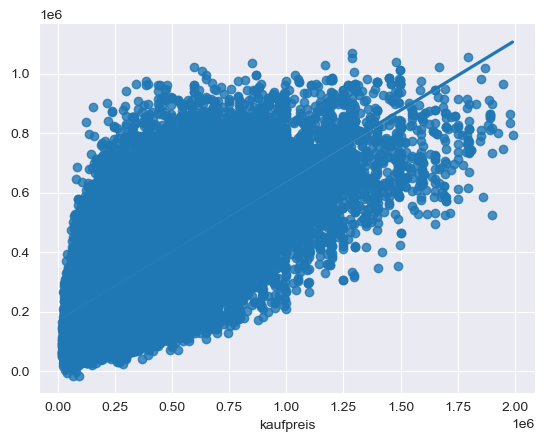

In [6]:
wk_characteristics = pd.read_csv('./Data/Cleaned-Datasets/WK_cities_cleaned.csv')
df_wk_characteristics = pd.DataFrame(wk_characteristics)

X = df_wk_characteristics[['wohnflaeche', 'zimmeranzahl', 'schlafzimmer', 'badezimmer', 'aufzug', 'age', 'objektzustand']]
Y = df_wk_characteristics['kaufpreis']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=101)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

print('Intercept:')
print(model.intercept_)

coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
#print(coeff_parameter)

predictions = model.predict(X_test)

sns.regplot(x=y_test, y=predictions)

X_train_Sm= sm.add_constant(X_train)
wk_ls = sm.OLS(y_train,X_train_Sm).fit()
#print(wk_ls.summary())

In [12]:
from stargazer.stargazer import Stargazer
stargazer_tab = Stargazer([hk_ls, wk_ls])
stargazer_tab.custom_columns(['House prices', 'Apartment prices'], [1, 1])
stargazer_tab.significant_digits(2)
#stargazer_tab.title('Model 1')
stargazer_tab.covariate_order(['const', 'age', 'wohnflaeche', 'zimmeranzahl', 'grundstuecksflaeche', 'schlafzimmer', 'badezimmer', 'parkplatz', 'keller', 'aufzug', 'objektzustand'])
stargazer_tab.rename_covariates({
    'age': 'Age', 
    'badezimmer': 'Number of bathrooms', 
    'const': 'Intercept', 
    'grundstuecksflaeche': 'Land area',
    'keller': 'Cellar', 
    'objektzustand': 'Object condition', 
    'parkplatz': 'Parkingspace', 
    'schlafzimmer': 'Number of bedrooms', 
    'wohnflaeche': 'Living space', 
    'zimmeranzahl': 'Number of rooms', 
    'aufzug': 'Elevator'
    })
open('./Regression-Output/model-1.tex', 'w').write(stargazer_tab.render_latex())
stargazer_tab